In [18]:
import mushi

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import msprime
import tskit
from itertools import tee


In [2]:
with open("../data/angsd_pi/v5--Teo--San_Lorenzo.sfs") as f:        
#with open("../data/angsd_sfs/v5--Teo--Amatlan_de_Canas_fold4_AT,TA,GC,CG_sfs.txt") as f:            
    sfs = f.readlines()[0].split()
    sfs = [float(s) for s in sfs]

t = np.logspace(np.log10(1), np.log10(500000), 100)

mu = 1e-7
bps = 10000
c = 1.6e-8

ksfs = mushi.kSFS(np.array(sfs[1:-1]))
ksfs.infer_history(t, mu0 = mu*sum(sfs), infer_mu=False, folded = False,
                   tol=1e-10, verbose=True, max_iter = 5000)

inferring η(t)
initial objective -1.012065e+08
iteration 5000, objective -1.018e+08, relative change 4.782e-09                                                                                                                                                                                                                                                                                                                                              
maximum iteration 5000 reached with relative change in objective function 4.8e-09


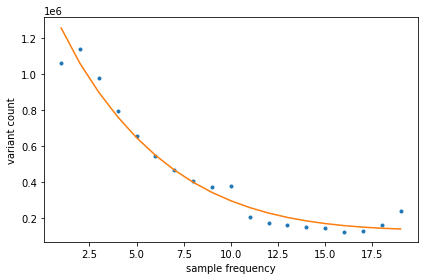

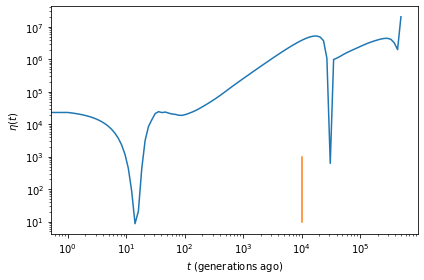

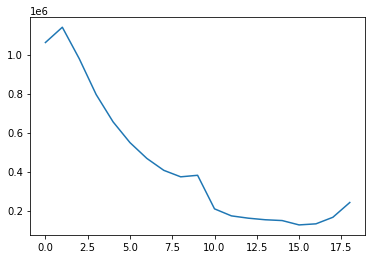

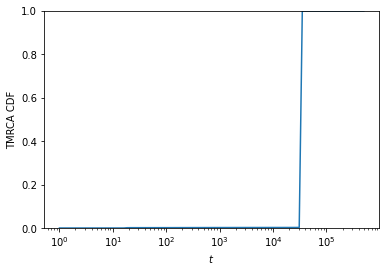

In [3]:
#fig, axs = plt.subplots(3)

ksfs.plot_total()
plt.show()
plt.xscale('log')
plt.yscale('log')
ksfs.eta.plot()
plt.plot((10000, 10000), (10, 1000))
plt.show()
plt.plot(sfs[1:-1])
plt.show()

plt.plot(t, ksfs.tmrca_cdf(ksfs.eta))
plt.xlabel('$t$')
plt.ylabel('TMRCA CDF')
plt.ylim([0, 1])
plt.xscale('log')
plt.show()

In [21]:
Nt = ksfs.eta.vals
T = ksfs.eta.change_points

N_0 = Nt[0] / 2
msp_N = Nt[1:] / 2
msp_T = T  
nsamp = len(sfs)-1

#ms_N = Nt[1:]/N_0
#ms_T = T/(4*N_0)


population_configurations = [msprime.PopulationConfiguration(sample_size = nsamp, initial_size = N_0)]
demography_list = [msprime.PopulationParametersChange(time = t, initial_size = n) for t, n, in zip(msp_T, msp_N)]

ts_mushi = msprime.simulate(
    population_configurations=population_configurations, 
    demographic_events = demography_list, 
    #Ne = N_0, sample_size = nsamp,
    length = bps, 
    recombination_rate = c, 
    mutation_rate = mu, 
    num_replicates = 5000
)

ts_mushi, ts_mushi_copy = tee(ts_mushi)


#pi = [ts.diversity() for ts in ts_mushi]
#td = [ts.Tajimas_D() for ts in ts_mushi]

print(np.nanmean(list(map(lambda a : [a.diversity().item(), a.Tajimas_D().item()], ts_mushi)), axis=0))
#list(map(lambda a : [a.diversity().item(), a.Tajimas_D().item()], ts_mushi))


[0.00638743 0.50973009]
